### Group 8 Collaborators



Students Names:

    1. Sammy Sifuna
    2. Julius Charles
    3. Waruchu Kuria
    4. Rael Ndonye
    5. Alan Omondi
    6. Janet Khainza


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TIME SERIES ANALYSIS FOR REAL ESTATE INVESTMENT

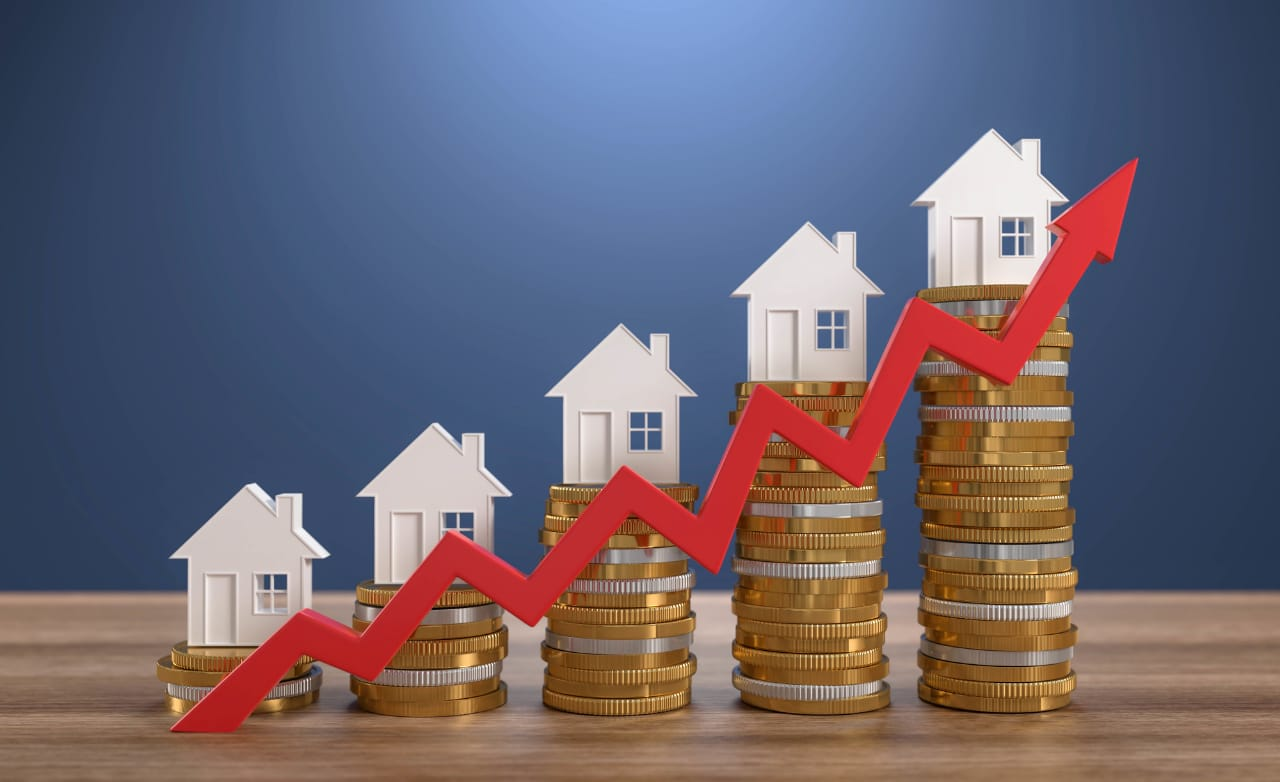

In [47]:
from IPython.display import Image
Image('/content/housing_image.jpg')

# 1.0 Business Understanding
       
### 1.1 Background

Between 1996 to 2018, the U.S. real estate market underwent significant transformations. It commenced with an increase in home prices driven by a growing perception of real estate as a valuable long-term investment. However, the Great Recession between 2007 to 2009 brought about extensive declines in home values, triggering foreclosures and eroding trust.
Over time,low interest rates and government interventions helped restore stability and confidence in the market. Urbanization gained momentum as more people gravitated towards cities, younger individuals entered the housing market, and technology assumed a pivotal role. Although certain cities thrived, others faced challenges. Regulatory reforms were introduced to prevent potential crises. In conclusion, this era marked a period of adaptation and evolution in the dynamics of buying and selling homes.

### 1.2 Problem Statement

Waridi Investments, a recently established real estate investment firm, has engaged our services to identify the top 5 zip codes with the potential for the highest return on investment when they sell in 5 years. Their strategic approach is to initiate short-term investments in one of the most thriving real estate markets in the United States of America. The company places significant emphasis on securing sound investments that ensure consistent cash flow, ultimately enabling them to reinvest effectively when the opportune moment arises.


### 1.3 Objectives

* To determine the top 5 zip codes that show the highest potential return on investment (ROI) in 5 years .
* To determine the 5 least advisable cities to invest in.
* To identify which top 5 metropolitan areas and states have the highest market performance in terms of price growth.
* To determine the best month to invest to maximize ROI.
* To show how factors like economic stability(recession) impact housing market performance.

#### Hypotheis testing

Null Hypothesis (H0): The variables do not help predict future real estate prices

Alternative Hypothesis (H1): The variables predict future real estate prices

# 2.0 Data Understanding

This data represents median monthly housing sales prices for 265 zip codes in the USA, over the period of April 1996 through April 2018 as reported by Zillow.

Each row represents a unique zip code. Each record contains location information and median housing sales prices for each month.

There are 11568 rows and 272 variables:

* RegionID: Unique index
* RegionName: Unique Zip Code
* City: City in which the zip code is located
* State: State in which the zip code is located
* Metro: Metropolitan Area in which the zip code is located
* CountyName: County in which the zip code is located
* SizeRank: Numerical rank of size of zip code, ranked 1 through 14723
* 1996-04 through 2018-04: refers to the median housing sales values for April 1996 through April 2018, that is 265 data points of monthly data for each zip code

We shall check for the accuracy of our forecasts using MSE (Mean Squared Error). This will provide us with the average error of our forecasts.

#### Assumptions:
1. The zip codes are representative of the broader real estate market in the United States.
2. The real estate market conditions during this period were influenced by various economic and socio-political factors.
3. The data covers a combination of urban, suburban, and rural area.
4. The data doesn't reflect significant improvements or renovations made to properties over time that could increase or decrease prices.

In [ ]:
# Import libraries
import numpy as np
import folium
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import stats
from random import gauss as gs
import math
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
#loading dataset and viewing first 5 rows
data = pd.read_csv('/content/zillow_data.csv')

data.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500.0,1007500.0,1007800.0,1009600.0,1013300.0,1018700.0,1024400.0,1030700.0,1033800.0,1030600.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000.0,310000.0,312500.0,314100.0,315000.0,316600.0,318100.0,319600.0,321100.0,321800.0
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000.0,320600.0,320200.0,320400.0,320800.0,321200.0,321200.0,323000.0,326900.0,329900.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800.0,1287700.0,1287400.0,1291500.0,1296600.0,1299000.0,1302700.0,1306400.0,1308500.0,1307000.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100.0,119400.0,120000.0,120300.0,120300.0,120300.0,120300.0,120500.0,121000.0,121500.0


In [ ]:
# Examine the shape of the dataset
data.shape

(11568, 272)

In [ ]:
# Viewing number of zipcodes in dataset and nan values

print('Total number of zipcodes:', len(data))
data.iloc[:, :20].isna().sum()

Total number of zipcodes: 11568


RegionID        0
RegionName      0
City            0
State           0
Metro         570
CountyName      0
SizeRank        0
1996-04       588
1996-05       588
1996-06       588
1996-07       588
1996-08       588
1996-09       588
1996-10       588
1996-11       588
1996-12       588
1997-01       588
1997-02       588
1997-03       588
1997-04       588
dtype: int64

In [ ]:
# all missing data because of the datatime appearing as columns
data.isnull().sum().sum()

87610

In [ ]:
#Inspecting dataframe dtypes

data.iloc[:, :10].dtypes

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
dtype: object

Our dataset includes 11568 zip codes. We are missing 1043 entries in our Metro column. The dataset as a whole has 157934 Null values that appear to be particular zipcodes missing median housing sales value data from the late 90s nand possible more.

In [ ]:
# checking for unique variables
data.nunique()

RegionID      11568
RegionName    11568
City           5765
State            51
Metro           695
              ...  
2017-12        4922
2018-01        4950
2018-02        4985
2018-03        5009
2018-04        4987
Length: 272, dtype: int64

In [ ]:
# change 'RegionName' column to 'ZipCode' to avoid confusion
data.rename(columns={'RegionName': 'ZipCode'}, inplace=True)

#confirming the change
data.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500.0,1007500.0,1007800.0,1009600.0,1013300.0,1018700.0,1024400.0,1030700.0,1033800.0,1030600.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000.0,310000.0,312500.0,314100.0,315000.0,316600.0,318100.0,319600.0,321100.0,321800.0
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000.0,320600.0,320200.0,320400.0,320800.0,321200.0,321200.0,323000.0,326900.0,329900.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800.0,1287700.0,1287400.0,1291500.0,1296600.0,1299000.0,1302700.0,1306400.0,1308500.0,1307000.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100.0,119400.0,120000.0,120300.0,120300.0,120300.0,120300.0,120500.0,121000.0,121500.0


In [ ]:
data.describe()

,RegionID,ZipCode,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,11568.000000,11568.000000,11568.000000,1.098000e+04,1.098000e+04,1.098000e+04,1.098000e+04,1.098000e+04,1.098000e+04,1.098000e+04,...,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04
mean,82023.678510,49384.009682,5784.500000,1.241443e+05,1.242658e+05,1.243866e+05,1.245063e+05,1.246399e+05,1.247966e+05,1.250019e+05,...,2.939238e+05,2.956024e+05,2.973867e+05,2.991622e+05,3.008380e+05,3.026037e+05,3.043736e+05,3.062386e+05,3.084711e+05,3.100208e+05
std,34508.587072,29784.592210,3339.538291,8.794993e+04,8.814502e+04,8.833974e+04,8.854039e+04,8.876665e+04,8.903430e+04,8.936373e+04,...,3.882850e+05,3.892970e+05,3.905923e+05,3.924007e+05,3.935752e+05,3.950668e+05,3.977490e+05,3.999797e+05,4.003936e+05,3.996505e+05
min,58196.000000,1001.000000,1.000000,1.400000e+04,1.430000e+04,1.450000e+04,1.480000e+04,1.500000e+04,1.530000e+04,1.540000e+04,...,1.820000e+04,1.890000e+04,1.970000e+04,2.060000e+04,2.100000e+04,2.080000e+04,2.050000e+04,2.080000e+04,2.130000e+04,2.150000e+04
25%,67798.250000,23647.750000,2892.750000,7.327500e+04,7.330000e+04,7.350000e+04,7.360000e+04,7.380000e+04,7.390000e+04,7.410000e+04,...,1.353500e+05,1.359000e+05,1.369000e+05,1.375500e+05,1.384000e+05,1.389000e+05,1.392000e+05,1.396000e+05,1.405000e+05,1.412500e+05
50%,78087.500000,46215.500000,5784.500000,1.055000e+05,1.055500e+05,1.056000e+05,1.057000e+05,1.057000e+05,1.059000e+05,1.062000e+05,...,2.023000e+05,2.034000e+05,2.049000e+05,2.064000e+05,2.077000e+05,2.088000e+05,2.099000e+05,2.115000e+05,2.132000e+05,2.144000e+05
75%,91839.250000,77060.250000,8676.250000,1.500000e+05,1.500000e+05,1.500000e+05,1.500250e+05,1.499000e+05,1.500250e+05,1.502000e+05,...,3.323000e+05,3.335000e+05,3.351500e+05,3.368000e+05,3.388000e+05,3.404000e+05,3.428500e+05,3.445500e+05,3.467000e+05,3.481000e+05
max,753844.000000,99901.000000,11568.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [ ]:
def melt_data(df):
    # Melt the DataFrame
    melted = pd.melt(df, id_vars=['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time', value_name='value')

    # Convert the 'time' column to datetime
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)

    # Drop rows with missing values in the 'value' column
    melted = melted.dropna(subset=['value'])

    # Group by 'time' and calculate the mean value
    result = melted.groupby('time').agg({'value': 'mean'}).reset_index()

    return result

result = melt_data(data)
print(result)


          time          value
0   1996-04-01  124144.298725
1   1996-05-01  124265.810565
2   1996-06-01  124386.648452
3   1996-07-01  124506.256831
4   1996-08-01  124639.890710
..         ...            ...
260 2017-12-01  302603.656955
261 2018-01-01  304373.554076
262 2018-02-01  306238.635774
263 2018-03-01  308471.098816
264 2018-04-01  310020.809199

[265 rows x 2 columns]


In [ ]:
data['ZipCode'] = data['ZipCode'].astype(str).str.zfill(5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11568 entries, 0 to 11567
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(253), int64(14), object(5)
memory usage: 24.0+ MB


### **5-year Return on Investment**

In [ ]:
# List of 5-year periods start and end years
periods = [(1998, 2003), (2003, 2008), (2008, 2013), (2013, 2018)]

# Create a new DataFrame to store ROI values
roi_data = pd.DataFrame()

# Calculate ROI for each period and store in the new DataFrame
for start_year, end_year in periods:
    start_col = str(start_year) + '-04'  # Assuming April data is available for each year
    end_col = str(end_year) + '-04'

    roi_data['ROI_' + str(start_year) + '-' + str(end_year)] = (
        (data[end_col] - data[start_col]) / data[start_col]
    ) * 100

# Display the new DataFrame with ROI values for each period
print(roi_data)


       ROI_1998-2003  ROI_2003-2008  ROI_2008-2013  ROI_2013-2018
0          93.194263      16.763396      -5.513813      26.082701
1         -11.761971      11.275026      -0.662879      53.384175
2          -6.113724      13.615665       3.046092      28.315830
3          83.249675      16.069798      -9.247443      25.878840
4           3.034134      57.423313     -11.535464       7.048458
...              ...            ...            ...            ...
11563      29.362881      12.955032       6.066351      34.226988
11564      44.854071      16.542948       1.910828      29.285714
11565      37.283500      -4.050465      -4.359862      23.733719
11566       8.406305      54.119548     -12.788260       9.375000
11567      30.841121      52.321429     -16.060961            NaN

[11568 rows x 4 columns]


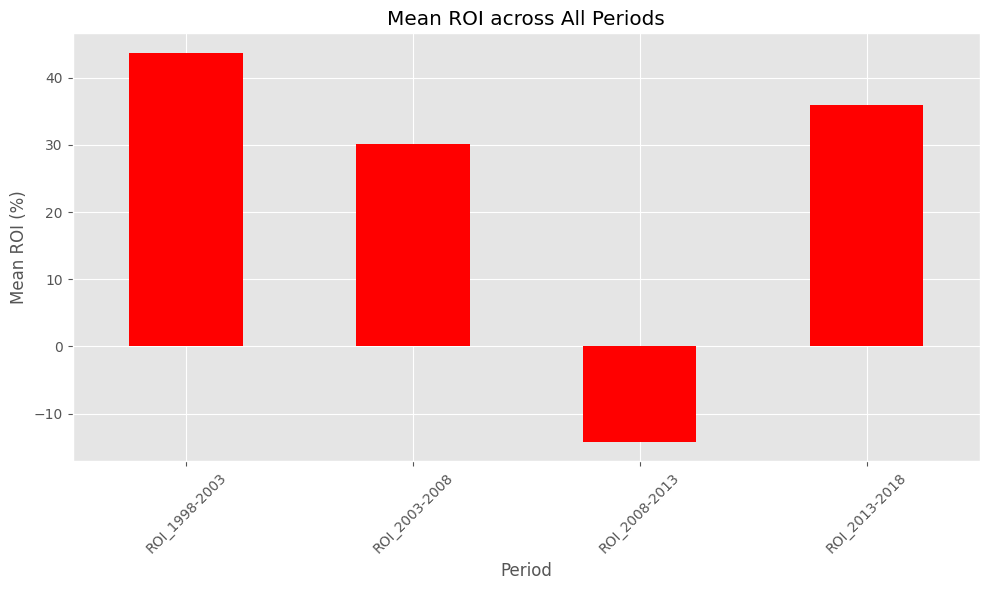

In [ ]:
# Calculate the mean ROI for all periods
mean_roi = roi_data.mean()

# Create a bar plot for mean ROI
plt.figure(figsize=(10, 6))
mean_roi.plot(kind='bar', color='red')
plt.title('Mean ROI across All Periods')
plt.xlabel('Period')
plt.ylabel('Mean ROI (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Drop unnecessary columns
data_copy = data.reset_index()
data_copy.drop(['index', 'RegionID', 'SizeRank'], axis=1, inplace=True)
print('Total Zipcodes in DataFrame:', len(data_copy))

Total Zipcodes in DataFrame: 11568


In [ ]:
#Check for zeros
data_copy.describe()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,1.098000e+04,1.098000e+04,1.098000e+04,1.098000e+04,1.098000e+04,1.098000e+04,1.098000e+04,1.098000e+04,1.098000e+04,1.098000e+04,...,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04,1.156700e+04
mean,1.241443e+05,1.242658e+05,1.243866e+05,1.245063e+05,1.246399e+05,1.247966e+05,1.250019e+05,1.252422e+05,1.256025e+05,1.260627e+05,...,2.939238e+05,2.956024e+05,2.973867e+05,2.991622e+05,3.008380e+05,3.026037e+05,3.043736e+05,3.062386e+05,3.084711e+05,3.100208e+05
std,8.794993e+04,8.814502e+04,8.833974e+04,8.854039e+04,8.876665e+04,8.903430e+04,8.936373e+04,8.974426e+04,9.023220e+04,9.078137e+04,...,3.882850e+05,3.892970e+05,3.905923e+05,3.924007e+05,3.935752e+05,3.950668e+05,3.977490e+05,3.999797e+05,4.003936e+05,3.996505e+05
min,1.400000e+04,1.430000e+04,1.450000e+04,1.480000e+04,1.500000e+04,1.530000e+04,1.540000e+04,1.550000e+04,1.560000e+04,1.580000e+04,...,1.820000e+04,1.890000e+04,1.970000e+04,2.060000e+04,2.100000e+04,2.080000e+04,2.050000e+04,2.080000e+04,2.130000e+04,2.150000e+04
25%,7.327500e+04,7.330000e+04,7.350000e+04,7.360000e+04,7.380000e+04,7.390000e+04,7.410000e+04,7.440000e+04,7.470000e+04,7.500000e+04,...,1.353500e+05,1.359000e+05,1.369000e+05,1.375500e+05,1.384000e+05,1.389000e+05,1.392000e+05,1.396000e+05,1.405000e+05,1.412500e+05
50%,1.055000e+05,1.055500e+05,1.056000e+05,1.057000e+05,1.057000e+05,1.059000e+05,1.062000e+05,1.063000e+05,1.065000e+05,1.070000e+05,...,2.023000e+05,2.034000e+05,2.049000e+05,2.064000e+05,2.077000e+05,2.088000e+05,2.099000e+05,2.115000e+05,2.132000e+05,2.144000e+05
75%,1.500000e+05,1.500000e+05,1.500000e+05,1.500250e+05,1.499000e+05,1.500250e+05,1.502000e+05,1.504250e+05,1.508000e+05,1.514000e+05,...,3.323000e+05,3.335000e+05,3.351500e+05,3.368000e+05,3.388000e+05,3.404000e+05,3.428500e+05,3.445500e+05,3.467000e+05,3.481000e+05
max,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,3.888900e+06,3.928800e+06,3.964600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


#### **Reshape from Wide to Long Format**

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['ZipCode', 'City', 'State', 'Metro', 'CountyName'],
                     var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [ ]:
melted_df = melt_data(data_copy)

In [ ]:
#Change Zipcode dtype to 'str'
melted_df['ZipCode'] = melted_df['ZipCode'].astype(str)

# Make sure the data type of the 'Date' column is datetime
melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%m/%y')

# Set the 'Date' column as index
melted_df.set_index('Date', inplace=True)

In [ ]:
melted_df.index

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=2978480, freq=None)

In [ ]:
melted_df.head()

,ZipCode,City,State,Metro,CountyName,value
Date,,,,,,
1996-04-01,60657,Chicago,IL,Chicago,Cook,334200.0
1996-04-01,75070,McKinney,TX,Dallas-Fort Worth,Collin,235700.0
1996-04-01,77494,Katy,TX,Houston,Harris,210400.0
1996-04-01,60614,Chicago,IL,Chicago,Cook,498100.0
1996-04-01,79936,El Paso,TX,El Paso,El Paso,77300.0


In [ ]:
melted_df.tail()

,ZipCode,City,State,Metro,CountyName,value
Date,,,,,,
2018-04-01,13634,Dexter,NY,Watertown,Jefferson,147100.0
2018-04-01,43102,Amanda,OH,Columbus,Fairfield,150200.0
2018-04-01,45644,Kingston,OH,Chillicothe,Ross,144800.0
2018-04-01,54448,Marathon,WI,Wausau,Marathon,171000.0
2018-04-01,72635,Gassville,AR,Mountain Home,Baxter,91000.0


In [ ]:
melted_df.shape

(2978480, 6)

# **3.0 Exploratory Data Analysis(EDA)**

In [ ]:
#check for nulls
melted_df.isna().sum()

ZipCode            0
City               0
State              0
Metro         132064
CountyName         0
value              0
dtype: int64

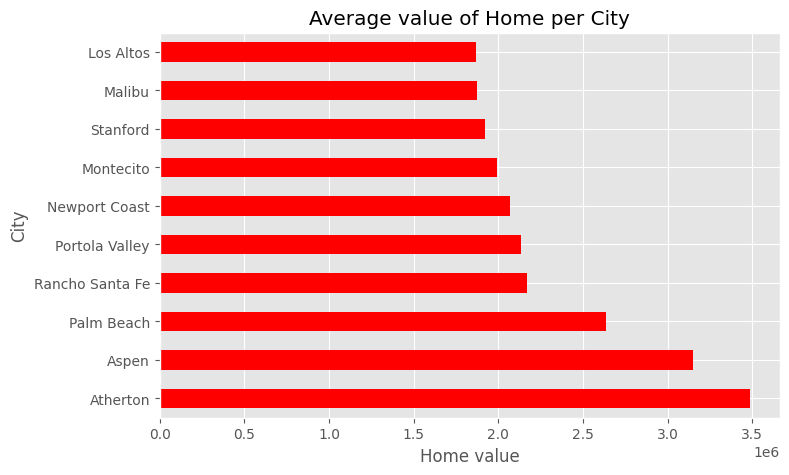

In [ ]:
city = melted_df.groupby('City')
city = city.value.mean()
city = city.sort_values(ascending=False).head(10)

fig =plt.figure(figsize=(8,5))
city.plot.barh(color='red')
plt.title('Average value of Home per City')
plt.xlabel('Home value')
plt.show();

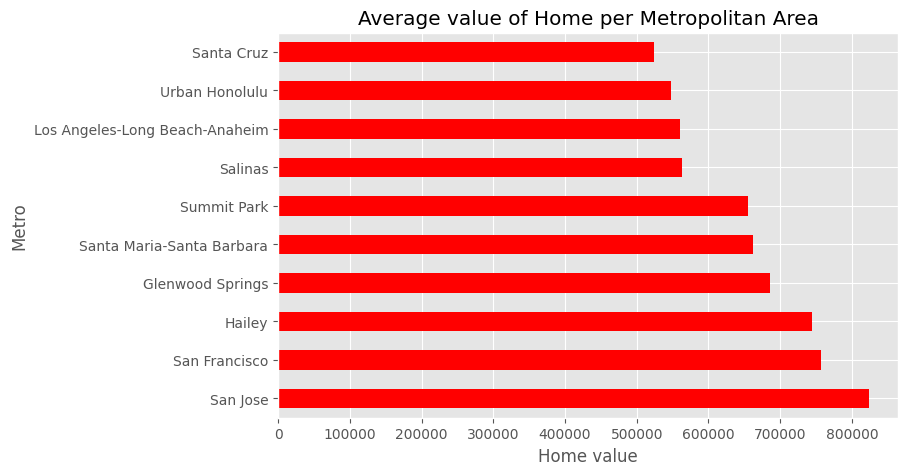

In [ ]:
metro = melted_df.groupby('Metro')
metro = metro.value.mean()
metro = metro.sort_values(ascending=False).head(10)

fig =plt.figure(figsize=(8,5))
metro.plot.barh(color='red')
plt.title('Average value of Home per Metropolitan Area')
plt.xlabel('Home value')
plt.show()

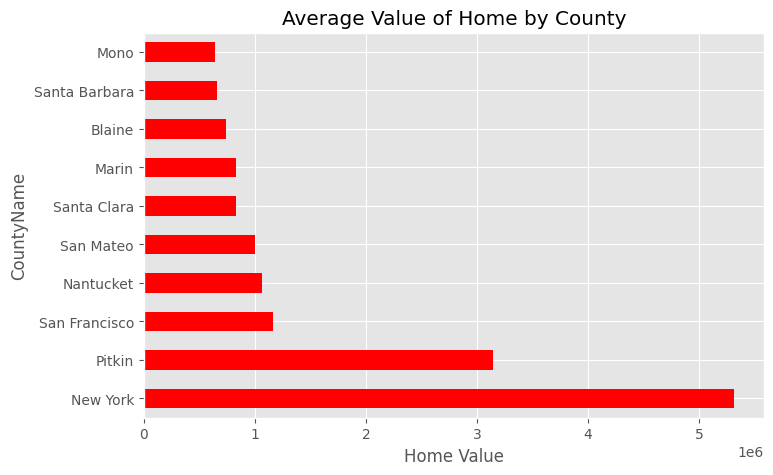

In [ ]:
county_name = melted_df.groupby('CountyName')
county_name = county_name.value.mean()
county_name = county_name.sort_values(ascending=False).head(10)

fig = plt.figure(figsize=(8,5))
county_name.plot.barh(color='red')
plt.title('Average Value of Home by County')
plt.xlabel('Home Value')
plt.show()

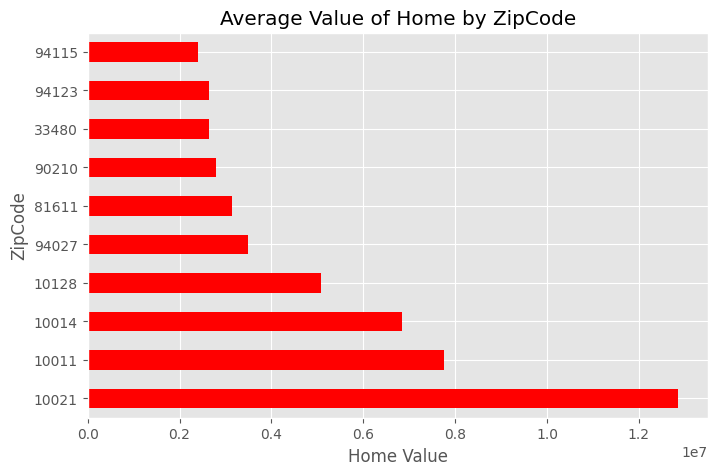

In [ ]:
zip_code = melted_df.groupby('ZipCode')
zip_code = zip_code.value.mean()
zip_code = zip_code.sort_values(ascending=False).head(10)

fig = plt.figure(figsize=(8,5))
zip_code.plot.barh(color='red')
plt.title('Average Value of Home by ZipCode')
plt.xlabel('Home Value')
plt.show()

In [ ]:
print('Average home value' ,round(melted_df['value'].mean()))

Average home value 219316


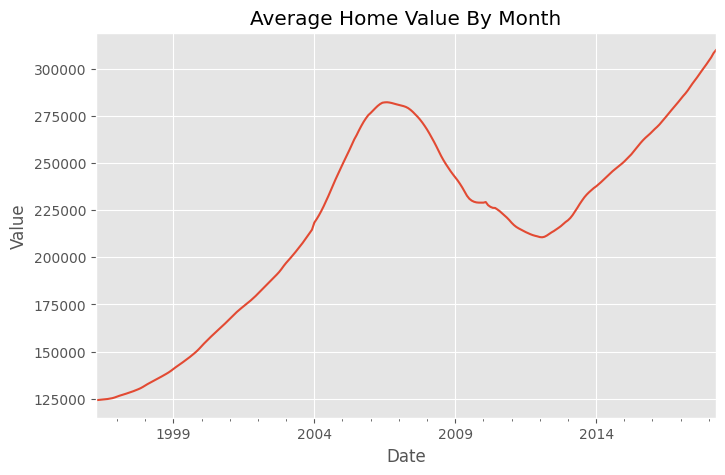

Date
1996-04-01    124144.298725
1996-05-01    124265.810565
1996-06-01    124386.648452
1996-07-01    124506.256831
1996-08-01    124639.890710
Freq: MS, Name: value, dtype: float64


In [ ]:
#data resampled by month
monthly_data = melted_df['value'].resample('MS').mean()
monthly_data = monthly_data.fillna(monthly_data.bfill())
monthly_data.plot(figsize=(8,5))
plt.title('Average Home Value By Month')
plt.ylabel('Value')
plt.show()
print(monthly_data.head())

<Axes: xlabel='Date'>

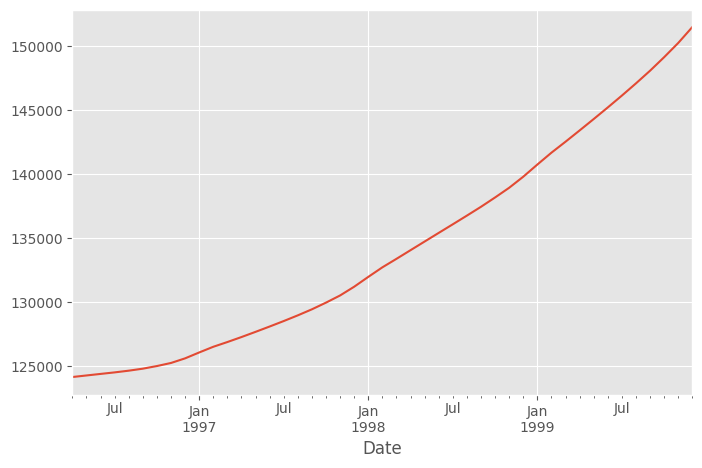

In [ ]:
monthly_data['1996':'1999'].plot(figsize=(8,5))

<Axes: xlabel='Date'>

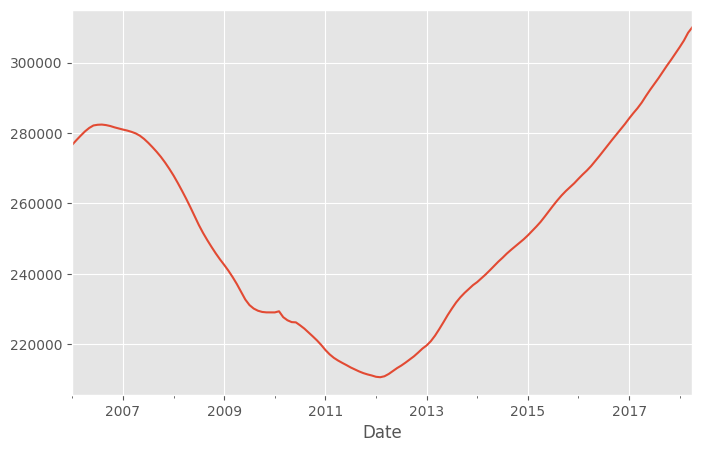

In [ ]:
monthly_data['2006':].plot(figsize=(8,5))

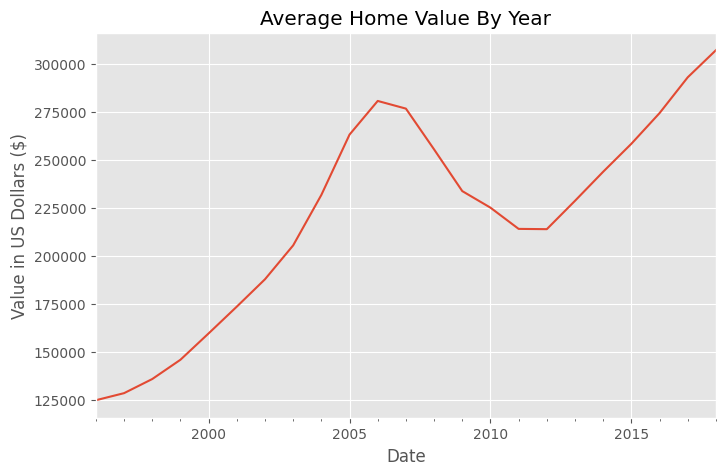

Date
1996-12-31    124731.790123
1997-12-31    128422.821038
1998-12-31    135788.478116
1999-12-31    145842.975627
2000-12-31    159588.205700
Freq: A-DEC, Name: value, dtype: float64


In [ ]:
yearly_data = melted_df['value'].resample('A').mean()
yearly_data.plot.line(figsize=(8,5))
plt.title('Average Home Value By Year')
plt.ylabel('Value in US Dollars ($)')
plt.show()
print(yearly_data.head())

The monthly and yearly home values seem to be similar. There doesn't seem to be any seasonality now but we will look into data decomposition and explore it further, but we do see a generaly upward trend with a dip downward between the years 2007-2012. Next, we will cut down on the number of Zipcodes to ensure we get the true most valuable zip codes.

In [ ]:
#taking into account the last 5years
data_copy.iloc[:,-60:].head()

,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,826800.0,837900.0,848100.0,853800.0,856700.0,856600.0,854400.0,853000.0,856200.0,859700.0,...,1005500.0,1007500.0,1007800.0,1009600.0,1013300.0,1018700.0,1024400.0,1030700.0,1033800.0,1030600.0
1,211300.0,214000.0,217200.0,220600.0,223800.0,226500.0,228600.0,230400.0,231800.0,233000.0,...,308000.0,310000.0,312500.0,314100.0,315000.0,316600.0,318100.0,319600.0,321100.0,321800.0
2,258300.0,260700.0,263900.0,267000.0,269200.0,271000.0,273100.0,275600.0,277600.0,279800.0,...,321000.0,320600.0,320200.0,320400.0,320800.0,321200.0,321200.0,323000.0,326900.0,329900.0
3,1053900.0,1070600.0,1089900.0,1108100.0,1123700.0,1135100.0,1141000.0,1143900.0,1145800.0,1147500.0,...,1289800.0,1287700.0,1287400.0,1291500.0,1296600.0,1299000.0,1302700.0,1306400.0,1308500.0,1307000.0
4,113300.0,113000.0,113000.0,112900.0,112800.0,112500.0,112400.0,112000.0,111500.0,111400.0,...,119100.0,119400.0,120000.0,120300.0,120300.0,120300.0,120300.0,120500.0,121000.0,121500.0


In [ ]:
data_copy['yr_avg']=data_copy.iloc[:,-60:].mean(skipna=True, axis=1)

#Get zipcodes with an average value 2 decile above the median and 2 deciles below.
print(data_copy['yr_avg'].describe(),'\n')

#Calculate the 70% cutoff value (2 decile above).
q_70 = data_copy['yr_avg'].quantile(q=0.70)
print(f'Average Value 70% cutoff value: {round(q_70,2)}')

#Calculate the 30% cutoff value (2 deciles below).
q_30 = data_copy['yr_avg'].quantile(q=0.30)
print(f'Average Value 30% cutoff value: {round(q_30,2)}')

#Get data frame with selected zipcodes.
data_avg = data_copy[(data_copy['yr_avg']<q_70) & (data_copy['yr_avg']>q_30)]
print(f'Amount of zipcodes: {len(data_avg)}')

count    1.156800e+04
mean     2.653865e+05
std      3.467746e+05
min      1.723333e+04
25%      1.238133e+05
50%      1.826783e+05
75%      3.000650e+05
max      1.662167e+07
Name: yr_avg, dtype: float64 

Average Value 70% cutoff value: 264950.83
Average Value 30% cutoff value: 134628.17
Amount of zipcodes: 4626


In [ ]:
data_avg.head()

,ZipCode,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,yr_avg
5,77084,Houston,TX,Houston,Harris,95000.0,95200.0,95400.0,95700.0,95900.0,...,158700.0,160200.0,161900.0,162800.0,162800.0,162800.0,162900.0,163500.0,164300.0,144023.333333
8,77449,Katy,TX,Houston,Harris,95400.0,95600.0,95800.0,96100.0,96400.0,...,167400.0,168400.0,169600.0,170900.0,172300.0,173300.0,174200.0,175400.0,176200.0,151155.000000
11,32162,The Villages,FL,The Villages,Sumter,101000.0,100700.0,100400.0,100100.0,99800.0,...,250400.0,249900.0,248700.0,247500.0,247100.0,246800.0,247500.0,249800.0,251800.0,240715.000000
14,37013,Nashville,TN,Nashville,Davidson,112400.0,112700.0,113000.0,113400.0,113900.0,...,194900.0,196600.0,198800.0,201300.0,203800.0,205900.0,207600.0,210000.0,211900.0,162231.666667
17,37211,Nashville,TN,Nashville,Davidson,97900.0,98000.0,98200.0,98400.0,98700.0,...,245000.0,246700.0,248800.0,251100.0,253900.0,256500.0,259000.0,262100.0,264200.0,199310.000000


In finance, the coefficient of variation allows investors to determine how much volatility, or risk, is assumed in comparison to the amount of return expected from investments. Ideally, if the coefficient of variation formula should result in a lower ratio of the standard deviation to mean return, then the better the risk-return trade-off. Therefore, in these next steps we are going to filter the data some more by calculating the CV value and only selecting values with in the company's risk factor (assume 60 percentile).

In [ ]:
#Calculate historical return on investment
data_avg['ROI'] = (data_avg['yr_avg']/data_avg['1996-04'])-1

#Calculate standard deviation of monthly values
data_avg['std'] = data_avg.loc[:,'1996-04':'2018-04'].std(skipna=True, axis=1)

#Calculate historical mean value
data_avg['mean'] = data_avg.loc[:,'1996-04':'2018-04'].mean(skipna=True, axis=1)

#Calculate coefficient of variation
data_avg['CV'] = data_avg['std']/data_avg['mean']

#Show calculated values
data_avg[['ZipCode','std','mean','ROI','CV','CountyName']].head()

,ZipCode,std,mean,ROI,CV,CountyName
5,77084,17242.109812,121185.283019,0.516035,0.142279,Harris
8,77449,18603.288493,126530.188679,0.584434,0.147026,Harris
11,32162,53805.394161,183692.830189,1.383317,0.292910,Sumter
14,37013,19771.938500,139191.698113,0.443342,0.142048,Davidson
17,37211,36496.608464,147387.924528,1.035853,0.247623,Davidson


In [ ]:
#find out the top 10 couties with highest ROI
county_top10 = data_avg.groupby('CountyName', group_keys=False).sum()['ROI']
county_top10.sort_values(ascending=False)[:10]

# sorted(round(grouped_county,2), reverse=True)[:10]

CountyName
Maricopa        66.686587
Hillsborough    50.461585
Jefferson       50.306700
Washington      42.792064
Hennepin        37.889906
Butler          34.051848
Clark           32.879833
Jackson         32.735457
Orange          32.411495
Worcester       32.371613
Name: ROI, dtype: float64

In [ ]:
#top 10 counties with highest ROI before considering risk factor CV
county_top10.sort_values(ascending=False)[:10].keys()

Index(['Maricopa', 'Hillsborough', 'Jefferson', 'Washington', 'Hennepin',
       'Butler', 'Clark', 'Jackson', 'Orange', 'Worcester'],
      dtype='object', name='CountyName')

In [ ]:
#Descriptive statistics of coefficients of variance.
print(data_avg.CV.describe())

#Define upper limit of CV according to risk profile.
upper_cv = data_avg.CV.quantile(.6)
print(f'\nCV upper limit: {upper_cv}')

#Get the 10 counties with highest ROIs within the firms risk profile.
data_top10 = data_avg[data_avg['CV']<upper_cv].sort_values('ROI', axis=0, ascending=False)

#find out the top 10 couties with highest ROI
county_top10 = data_top10.groupby('CountyName').sum()['ROI']
county_top10.sort_values(ascending=False)[:10]

count    4626.000000
mean        0.219035
std         0.077412
min         0.027928
25%         0.162376
50%         0.214191
75%         0.265893
max         0.597757
Name: CV, dtype: float64

CV upper limit: 0.23479898418156717


CountyName
Jefferson     31.667640
Harris        27.616441
Washington    26.103849
Johnson       25.536494
Montgomery    22.330527
Worcester     20.770417
Franklin      20.179786
Douglas       19.962780
Lancaster     19.447994
Tarrant       18.570255
Name: ROI, dtype: float64

In [ ]:
top10_county = list(county_top10.sort_values(ascending=False)[:10].index)
top10_county

['Jefferson',
 'Harris',
 'Washington',
 'Johnson',
 'Montgomery',
 'Worcester',
 'Franklin',
 'Douglas',
 'Lancaster',
 'Tarrant']

In [ ]:
data_top10.shape

(2775, 275)

In [ ]:
data_top10 = data_top10.loc[data_top10['CountyName'].isin(top10_county)]
data_top10.shape

(351, 275)